In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
from glob import glob
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

SETS_PATH = '../covid_dataset/'
LABELS = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

2021-10-10 16:01:56.701600: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

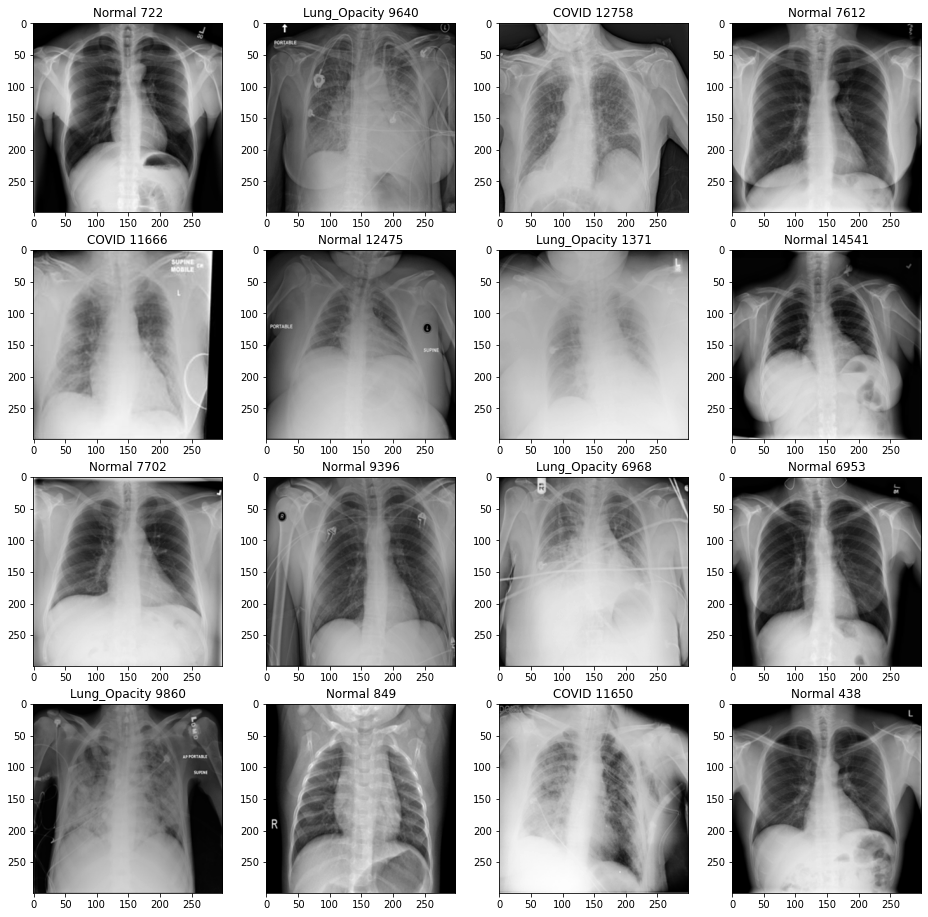

In [5]:
images_in_row = 4
random_indexes = random.choices(range(len(y_train)), k=images_in_row*images_in_row)
      
plt.figure(figsize=(16,16))
for j, index in enumerate(random_indexes):
    plt.subplot(images_in_row, images_in_row, j+1)
    plt.imshow(X_train[index], cmap='gray', vmax=1, vmin=0)
    plt.title(f'{LABELS[np.where(y_train[index]==1)[0][0]]} {index}')

In [8]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=[299,299, 1]))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.5))

my_model.add(Conv2D(128, kernel_size=4, activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.3))

my_model.add(Conv2D(64, kernel_size=3, activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.3))

my_model.add(Conv2D(32, kernel_size=3, activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.3))

my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(128, activation='relu'))
my_model.add(Dense(4, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 295, 295, 64)      1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 147, 147, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 147, 147, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 144, 144, 128)     131200    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 72, 72, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 72, 72, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 70, 70, 64)       

In [9]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='checkpoints/2/epoch{epoch}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
csv_logger = keras.callbacks.CSVLogger('history/history2.csv')

history = my_model.fit(X_train, y_train,
                     epochs=50, batch_size=16, callbacks=[callback,model_checkpoint_callback,csv_logger],
                     verbose=1, validation_data=(X_test, y_test))

2021-10-10 16:41:10.708955: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 5297903260 exceeds 10% of free system memory.


Epoch 1/50
926/926 [==============================] - ETA: 0s - loss: 0.9757 - accuracy: 0.5906

2021-10-10 16:46:37.540613: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2270785400 exceeds 10% of free system memory.


926/926 [==============================] - 365s 367ms/step - loss: 0.9756 - accuracy: 0.5907 - val_loss: 0.9321 - val_accuracy: 0.6002
Epoch 2/50
926/926 [==============================] - 309s 334ms/step - loss: 0.6734 - accuracy: 0.7310 - val_loss: 0.7816 - val_accuracy: 0.6605
Epoch 3/50
926/926 [==============================] - 306s 330ms/step - loss: 0.5570 - accuracy: 0.7838 - val_loss: 0.6654 - val_accuracy: 0.7239
Epoch 4/50
926/926 [==============================] - 307s 331ms/step - loss: 0.4745 - accuracy: 0.8193 - val_loss: 0.5286 - val_accuracy: 0.8003
Epoch 5/50
926/926 [==============================] - 309s 334ms/step - loss: 0.4249 - accuracy: 0.8295 - val_loss: 0.7616 - val_accuracy: 0.7082
Epoch 6/50
926/926 [==============================] - 309s 334ms/step - loss: 0.3932 - accuracy: 0.8503 - val_loss: 0.9000 - val_accuracy: 0.6764
Epoch 7/50
926/926 [==============================] - 310s 334ms/step - loss: 0.3545 - accuracy: 0.8632 - val_loss: 0.8210 - val_accura